### Info

The models trained on datasets that split according to gestational ages were evaluated in this notebook. There might be slight differences between evaluation scores in Tensorboard files and the results below due to 'overlap mode' of torchio library. 'average' overlap mode gives better results than 'crop' overlap mode but this didn't affect the models performances. The 'average' overlap mode used to obtain results below.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torchio as tio
import torchvision.transforms as transforms

from data.Dataset import *
from data.transforms import *
from models import Evaluator3D, models
from models.Predictor import Predictor
from utils.LossFunctions import DC_and_CE_loss, GDiceLossV2
from utils.Utils import *

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset_path = "../../data/processed/lucas/"

# Transformations.
transform_eval = None

# Split dataset.
early_weeks_val = MRIDataset(EarlyWeeks, "val", dataset_path, transform=transform_eval)
early_weeks_test = MRIDataset(EarlyWeeks, "test", dataset_path, transform=transform_eval)

middle_weeks_val = MRIDataset(MiddleWeeks, "val", dataset_path, transform=transform_eval)
middle_weeks_test = MRIDataset(MiddleWeeks, "test", dataset_path, transform=transform_eval)

late_weeks_val = MRIDataset(LateWeeks, "val", dataset_path, transform=transform_eval)
late_weeks_test = MRIDataset(LateWeeks, "test", dataset_path, transform=transform_eval)

torch.manual_seed(0)
early_val_loader = torch.utils.data.DataLoader(dataset=early_weeks_val, batch_size=1)
early_test_loader = torch.utils.data.DataLoader(dataset=early_weeks_test, batch_size=1)

middle_val_loader = torch.utils.data.DataLoader(dataset=middle_weeks_val, batch_size=1)
middle_test_loader = torch.utils.data.DataLoader(dataset=middle_weeks_test, batch_size=1)

late_val_loader = torch.utils.data.DataLoader(dataset=late_weeks_val, batch_size=1)
late_test_loader = torch.utils.data.DataLoader(dataset=late_weeks_test, batch_size=1)


early_weeks_val.meta_data = early_weeks_val.meta_data.drop(columns=['Unnamed: 3'])
early_weeks_test.meta_data = early_weeks_test.meta_data.drop(columns=['Unnamed: 3'])

middle_weeks_val.meta_data = middle_weeks_val.meta_data.drop(columns=['Unnamed: 3'])
middle_weeks_test.meta_data = middle_weeks_test.meta_data.drop(columns=['Unnamed: 3'])

late_weeks_val.meta_data = late_weeks_val.meta_data.drop(columns=['Unnamed: 3'])
late_weeks_test.meta_data = late_weeks_test.meta_data.drop(columns=['Unnamed: 3'])

In [3]:
criterion = DC_and_CE_loss({'batch_dice': True, 'smooth': 1e-5, 'do_bg': False, 'square': False}, {})

### Warning! 
Tensorboard event files contains validation scores, not test scores.

### EarlyWeeks

In [4]:
path_events_file = '../../models/20221228/EarlyGA/events.out.tfevents.1672256397.DESKTOP-BN0TMAF.4360.0'
results = read_scalars(path_events_file, -1)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Epoch:  10


In [5]:
early_weeks_model = models.UNet3D().to(device)
early_weeks_model.load_state_dict(torch.load("../../models/20221228/EarlyGA/weights/9_model.pth"))

predictor = Predictor(early_weeks_model, (128, 128, 128))
sub = early_weeks_test[0]

Validation : 100%|██████████| 3/3 [00:13<00:00,  4.49s/it, Loss: -0.7227]


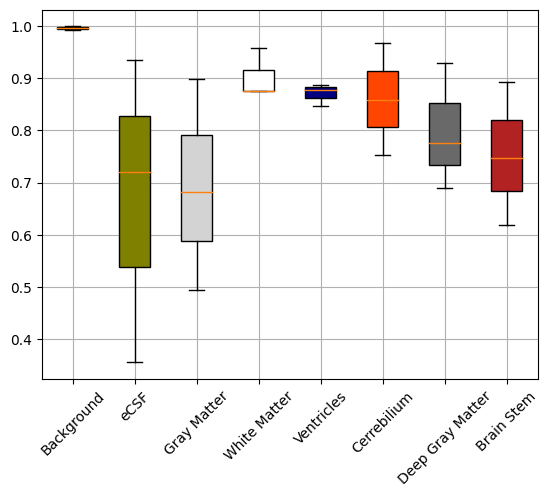

,0,1,2,3,4,5,6,7
0,0.996069,0.669747,0.691235,0.902564,0.870709,0.859749,0.798133,0.753052


In [6]:
evaluator = Evaluator3D(criterion, early_weeks_model, (128, 128, 128), early_val_loader)
_, scores = evaluator.evaluate()
avg_scores = print_evaluation_results(scores, early_weeks_val)
pd.DataFrame(avg_scores).T

Validation : 100%|██████████| 3/3 [00:14<00:00,  4.93s/it]


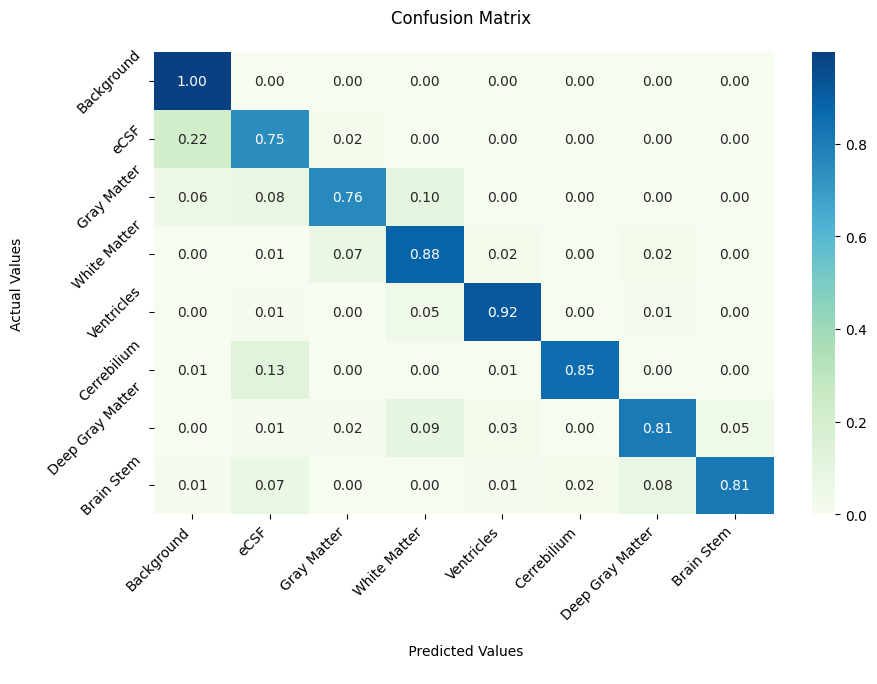

In [7]:
evaluator.calculate_cm()
evaluator.plot_confusion_matrix()

Validation : 100%|██████████| 3/3 [00:11<00:00,  3.96s/it, Loss: -0.7421]


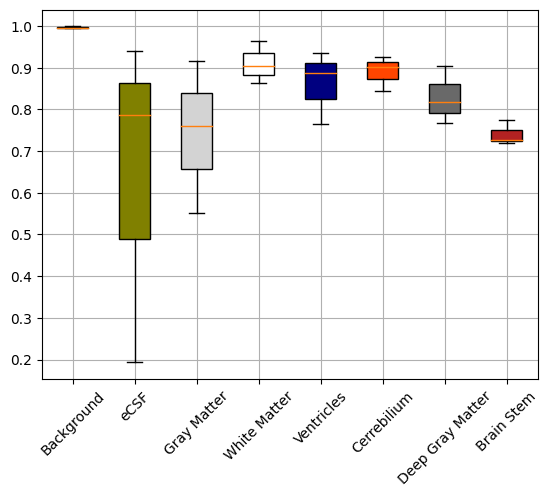

,0,1,2,3,4,5,6,7
0,0.996541,0.639723,0.743375,0.911058,0.862096,0.890938,0.829519,0.74074


In [8]:
tester = Evaluator3D(criterion, early_weeks_model, (128, 128, 128), early_test_loader)
_, scores = tester.evaluate()
avg_scores = print_evaluation_results(scores, early_weeks_test)
pd.DataFrame(avg_scores).T

Validation : 100%|██████████| 3/3 [00:15<00:00,  5.03s/it]


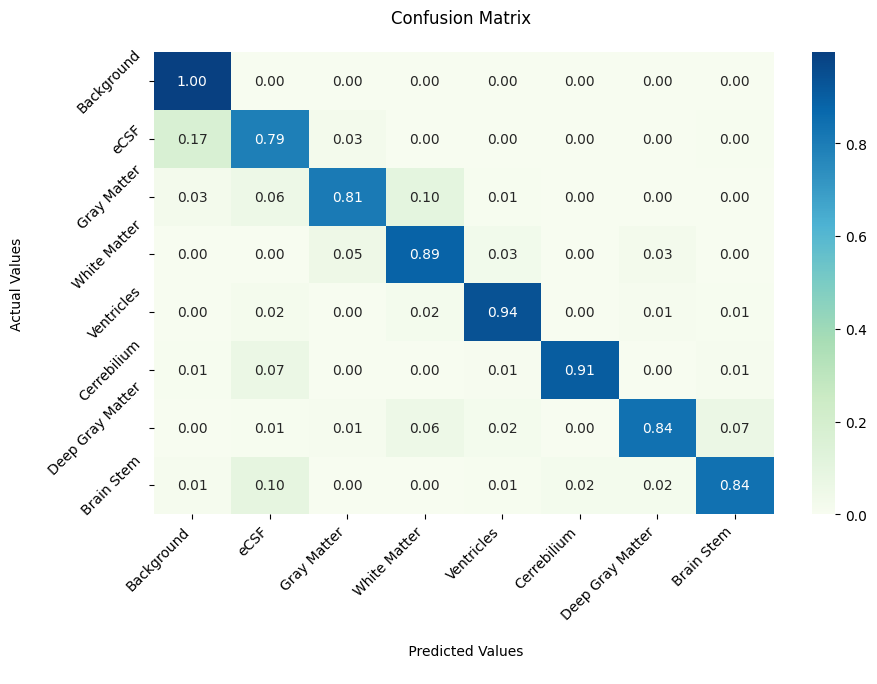

In [9]:
tester.calculate_cm()
tester.plot_confusion_matrix()

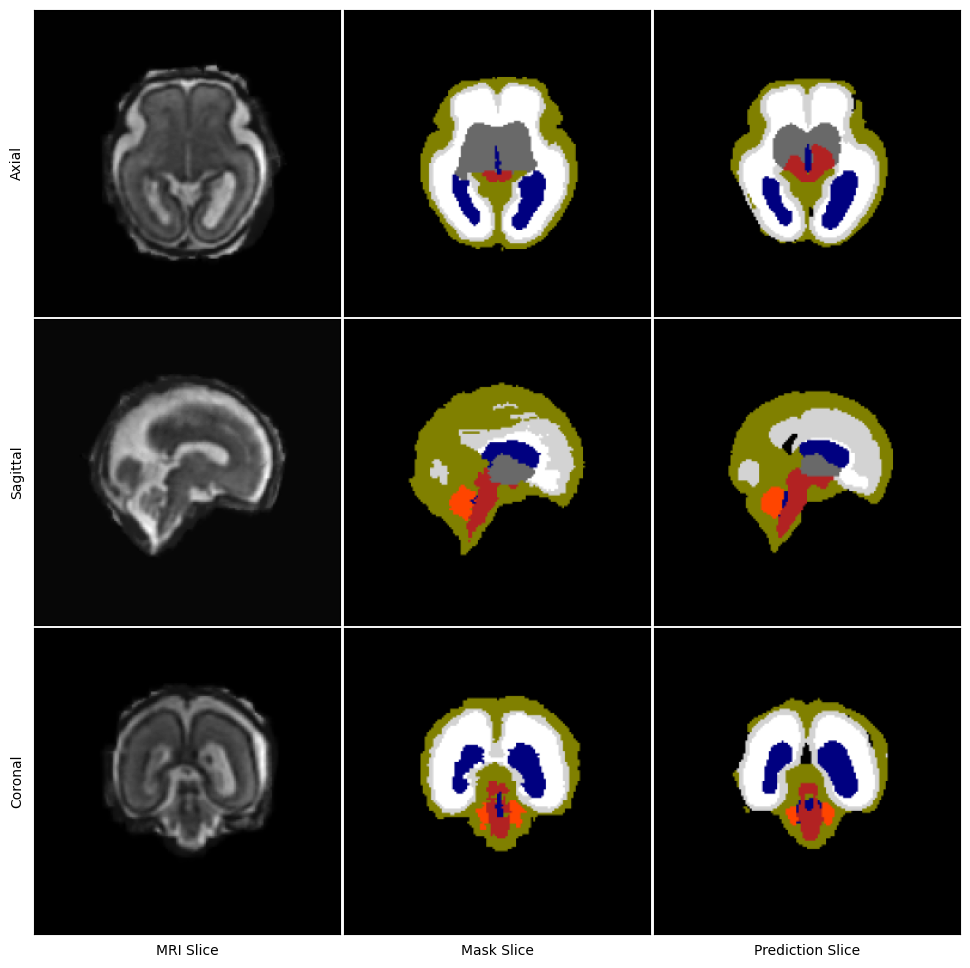

'sub-039'

In [10]:
prediction = predictor.predict(sub)
pred_mask = torch.argmax(prediction, dim=1)
slice_idx = 70

plot_sub_orient(sub.mri.data, sub.mask.data, pred_mask, slice_idx)
sub.sub_id

### MiddleWeeks

In [11]:
path_events_file = '../../models/20221228/MiddleGA/events.out.tfevents.1672262049.DESKTOP-BN0TMAF.10392.0'
results = read_scalars(path_events_file, -1)

Epoch:  22


In [12]:
middle_weeks_model = models.UNet3D().to(device)
middle_weeks_model.load_state_dict(torch.load("../../models/20221228/MiddleGA/weights/21_model.pth"))

predictor = Predictor(middle_weeks_model, (128, 128, 128))
sub = middle_weeks_test[0]

Validation : 100%|██████████| 6/6 [00:23<00:00,  3.97s/it, Loss: -0.8416]


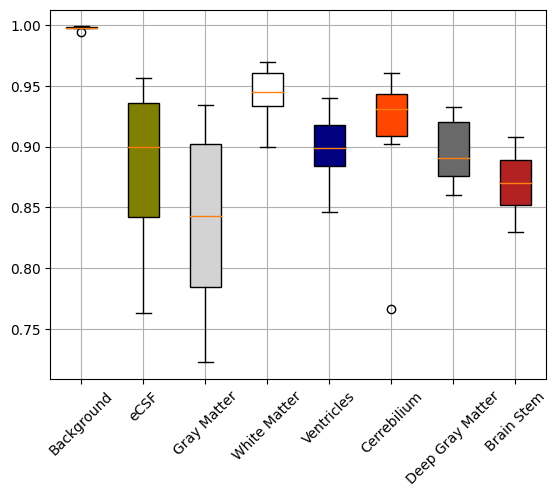

,0,1,2,3,4,5,6,7
0,0.997411,0.881894,0.838253,0.942556,0.897962,0.906263,0.895777,0.869949


In [13]:
evaluator = Evaluator3D(criterion, middle_weeks_model, (128, 128, 128), middle_val_loader)
_, scores = evaluator.evaluate()
avg_scores = print_evaluation_results(scores, middle_weeks_val)
pd.DataFrame(avg_scores).T

Validation : 100%|██████████| 6/6 [00:30<00:00,  5.09s/it]


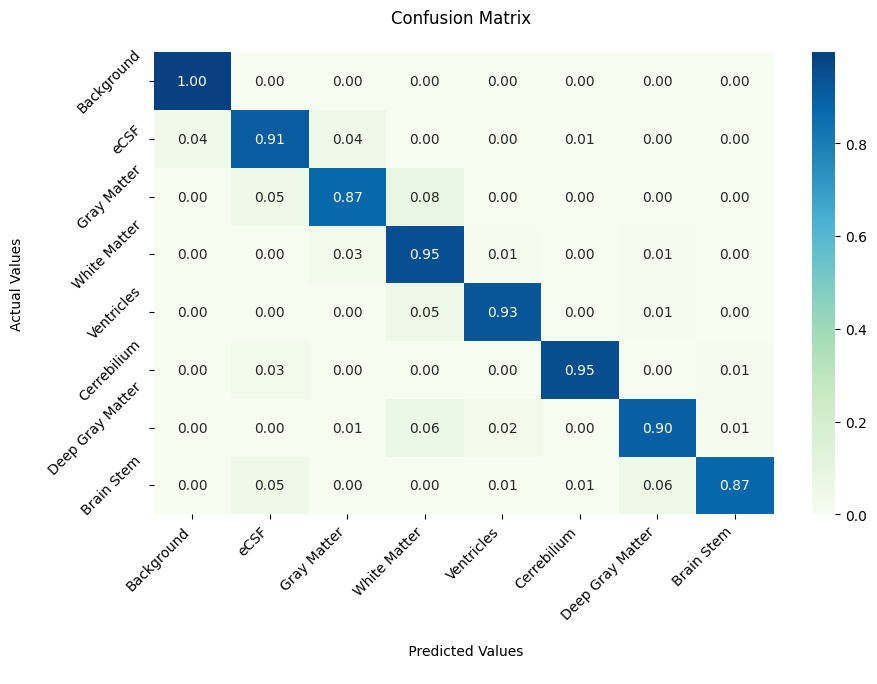

In [14]:
evaluator.calculate_cm()
evaluator.plot_confusion_matrix()

Validation : 100%|██████████| 6/6 [00:24<00:00,  4.01s/it, Loss: -0.8534]


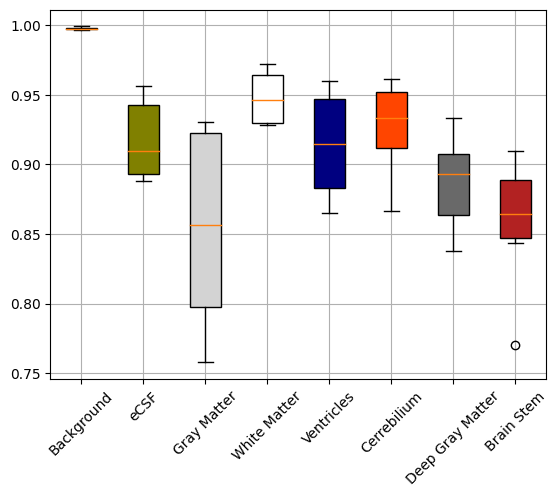

,0,1,2,3,4,5,6,7
0,0.997859,0.917503,0.853863,0.947951,0.914199,0.926492,0.887195,0.857841


In [15]:
tester = Evaluator3D(criterion, middle_weeks_model, (128, 128, 128), middle_test_loader)
_, scores = tester.evaluate()
avg_scores = print_evaluation_results(scores, middle_weeks_test)
pd.DataFrame(avg_scores).T

Validation : 100%|██████████| 6/6 [00:31<00:00,  5.17s/it]


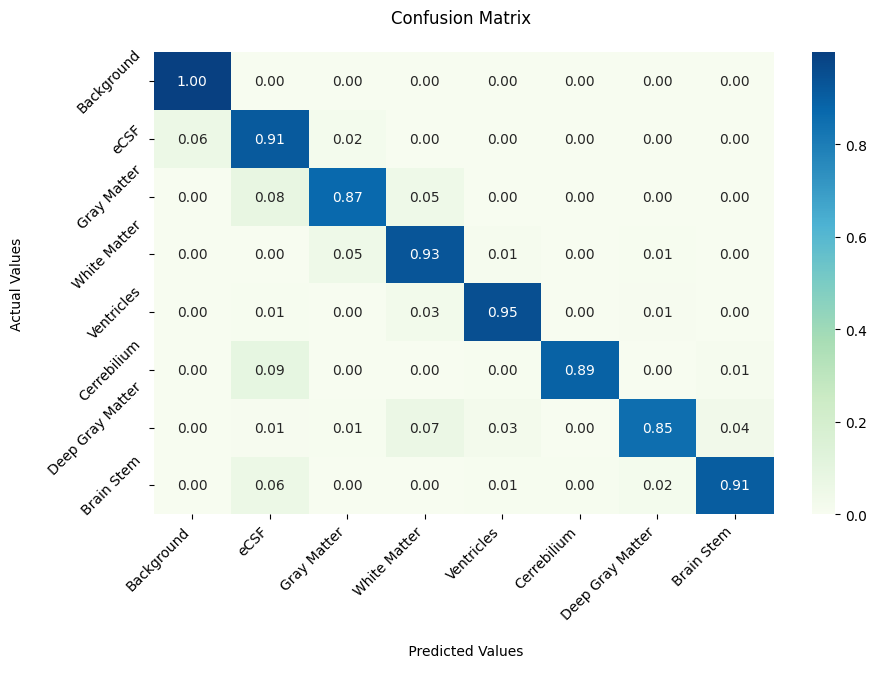

In [16]:
tester.calculate_cm()
tester.plot_confusion_matrix()

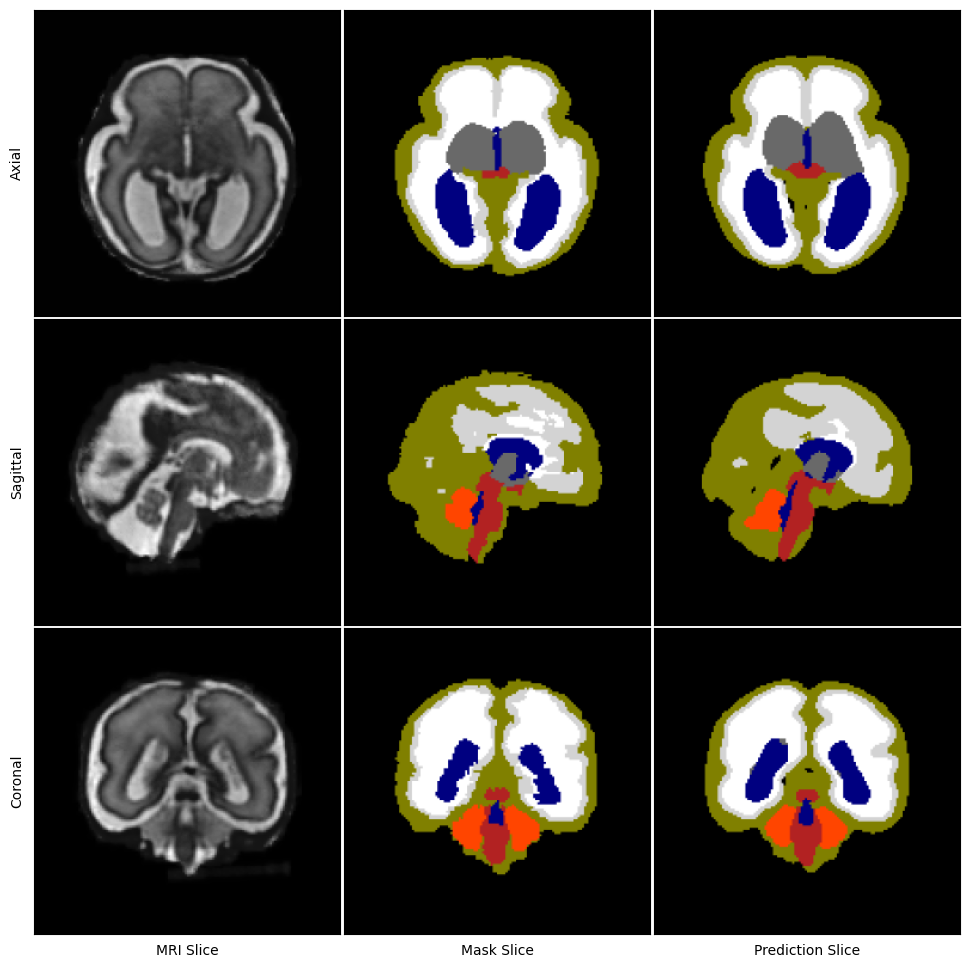

'sub-034'

In [17]:
prediction = predictor.predict(sub)
pred_mask = torch.argmax(prediction, dim=1)
slice_idx = 70

plot_sub_orient(sub.mri.data, sub.mask.data, pred_mask, slice_idx)
sub.sub_id

### LateWeeks

In [18]:
path_events_file = '../../models/20221228/LateGA/events.out.tfevents.1672295045.DESKTOP-BN0TMAF.10424.0'
results = read_scalars(path_events_file, -1)

Epoch:  18


In [20]:
late_weeks_model = models.UNet3D().to(device)
late_weeks_model.load_state_dict(torch.load("../../models/20221228/LateGA/weights/17_model.pth"))

predictor = Predictor(late_weeks_model, (128, 128, 128))
sub = late_weeks_test[0]

Validation : 100%|██████████| 3/3 [00:11<00:00,  3.81s/it, Loss: -0.8435]


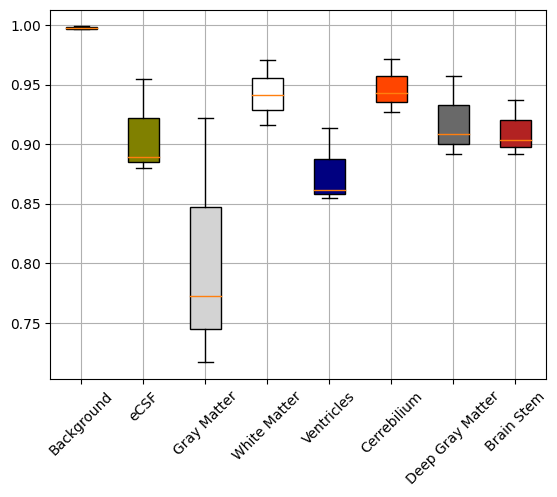

,0,1,2,3,4,5,6,7
0,0.997673,0.908079,0.80385,0.942423,0.876434,0.947162,0.919085,0.91094


In [21]:
evaluator = Evaluator3D(criterion, late_weeks_model, (128, 128, 128), late_val_loader)
_, scores = evaluator.evaluate()
avg_scores = print_evaluation_results(scores, late_weeks_val)
pd.DataFrame(avg_scores).T

Validation : 100%|██████████| 3/3 [00:14<00:00,  4.80s/it]


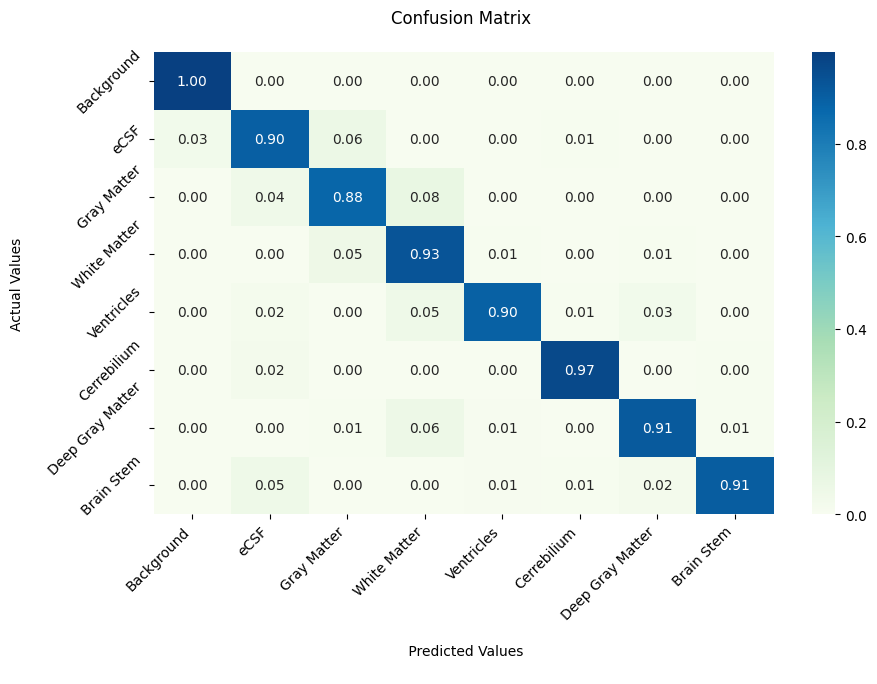

In [22]:
evaluator.calculate_cm()
evaluator.plot_confusion_matrix()

Validation : 100%|██████████| 3/3 [00:11<00:00,  3.96s/it, Loss: -0.8554]


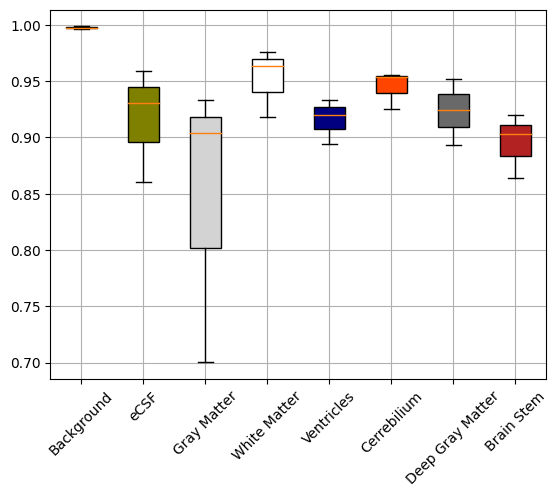

,0,1,2,3,4,5,6,7
0,0.997629,0.916661,0.845512,0.952533,0.916035,0.944985,0.923276,0.895513


In [23]:
tester = Evaluator3D(criterion, late_weeks_model, (128, 128, 128), late_test_loader)
_, scores = tester.evaluate()
avg_scores = print_evaluation_results(scores, late_weeks_test)
pd.DataFrame(avg_scores).T

Validation : 100%|██████████| 3/3 [00:15<00:00,  5.05s/it]


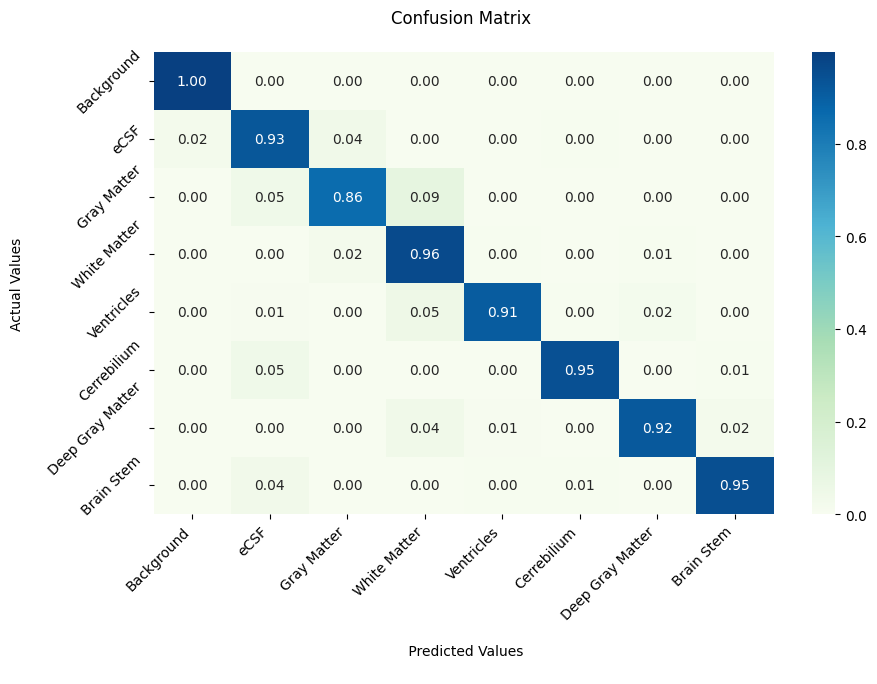

In [24]:
tester.calculate_cm()
tester.plot_confusion_matrix()

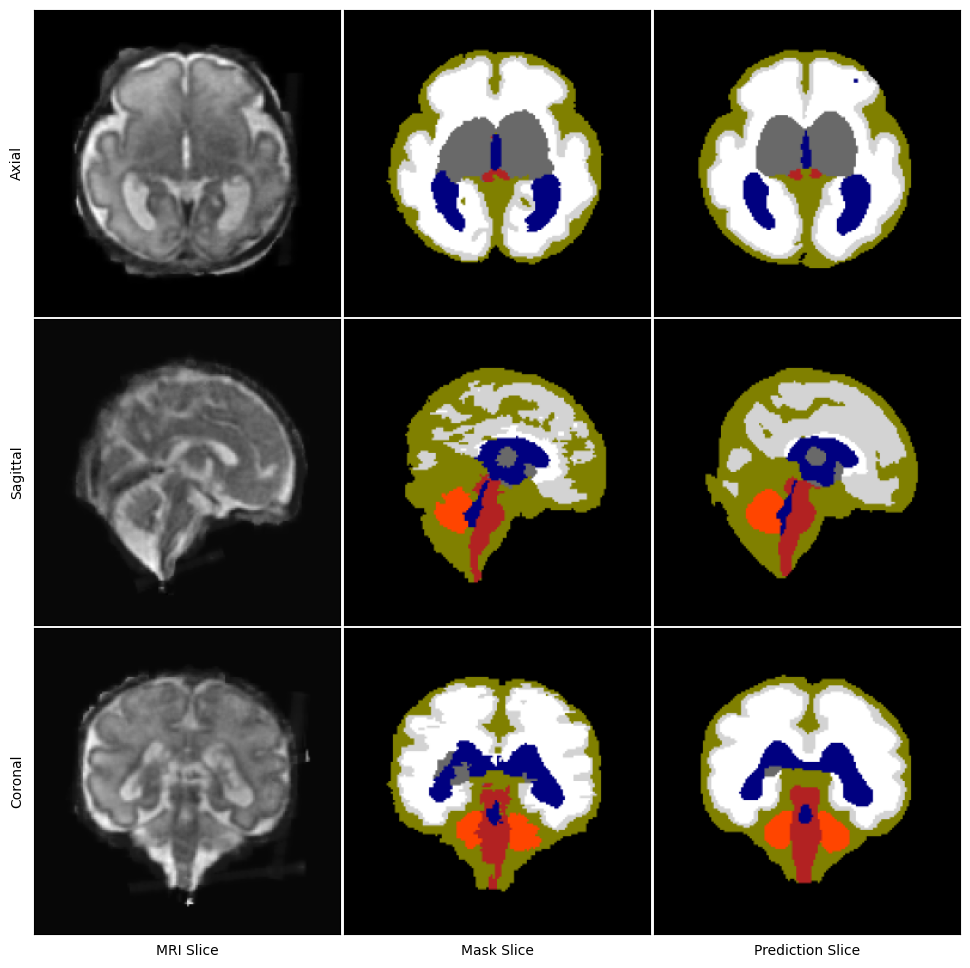

'sub-035'

In [25]:
prediction = predictor.predict(sub)
pred_mask = torch.argmax(prediction, dim=1)
slice_idx = 70

plot_sub_orient(sub.mri.data, sub.mask.data, pred_mask, slice_idx)
sub.sub_id